# Natural Language Processing and Disaster Tweets # 

## Introduction and Overview ##
In order to get more hands on with Natural Language Processing, sometimes it's best to use real world data.  For this exercise, we are going to be using Twitter to determine which tweets are talking about real world disasters and which ones are not.  There are over 10000 tweets that have been classified as real or fake diasasters and and the task is to create a machine learning model that can tell the difference.  

### Exploratory Data Analysis ###
This is where an intial look into the data will be done and eventually organized so that the next step can begin. That next step is model building.

### Model Building and Training ###
Here is where the model will be trained as the dataset is split into test and training sets. Fine tuning of the models will also happen here.

### Model Comparisons ###
As stated previously one of the requirements of the assignment is to compare to a supervised learning model. This is also just a good practice to do when doing any machine learning project.

### Results and Conculsions ###
Quick results summary and review what changes should be made

## EDA ##

In [35]:
!pip install --upgrade nltk

In [36]:
# These first libraries are pretty typical libraries to have loaded into most projects when using python
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os


These next libraries are important for pre-processing the data and being able to perform any type of natural language processing.
're' will help with working on regular expressions, which is a tool that will be beneficial to help perform pattern matching and string manipulation.
Another small module that will be uploaded is the 'string' module that will help convert any digits into strings easier.
The next library that is extremely important is the NLTK library. NLTK stands for "Natural Language Processing". This is the library of choice for this assignemnt because of it's ability to work with the human language as well as it's ease of use. This library allows the use of classification, tokenization, stemming, parsing and much more.

In [37]:
import re
from string import punctuation, digits
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /usr/share/nltk_data...
[nltk_data]    |   Pack

The last library to install is sklearn, which is the most helpful tool for modeling. 

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
import itertools
from sklearn.model_selection import train_test_split

In [39]:
sample = '/kaggle/input/nlp-datasets/sample_submission.csv'
testing_data = '/kaggle/input/nlp-datasets/test.csv'
training_data = '/kaggle/input/nlp-datasets/train.csv'
sample_solution = pd.read_csv(sample)
test_data = pd.read_csv(testing_data)
train_data = pd.read_csv(training_data)

In [40]:
sample_solution


,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [41]:
test_data


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [42]:
train_data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


The training and testing data are pretty similar but you can see that there is a 'target' column in the training data which makes sense.  That indicates if the disaster is real or not.  1 being real, 0 being fake.  Next, lets take a look at the location columns for the fake and real datasets to see if there is a pattern.

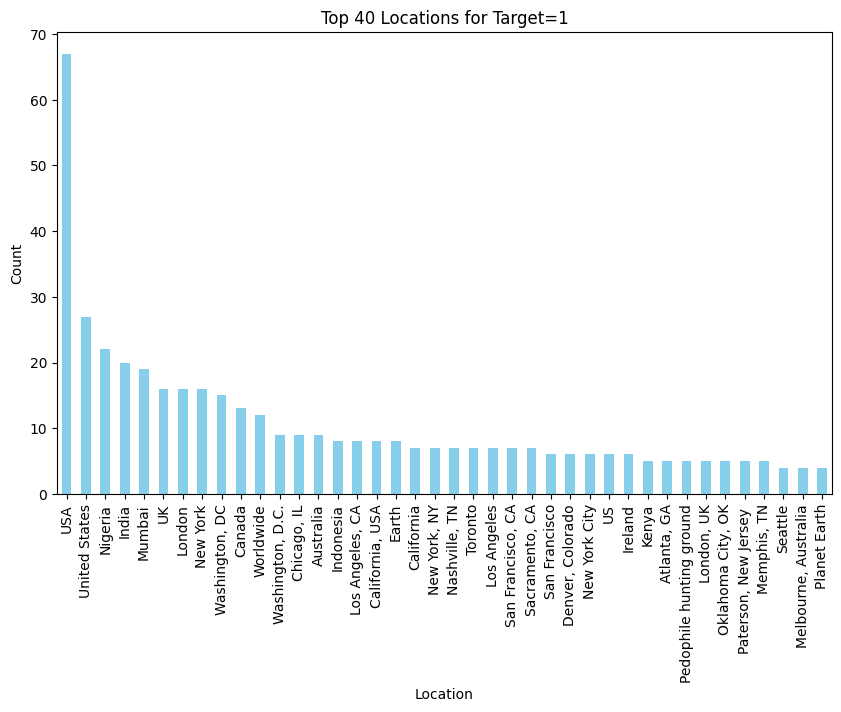

In [43]:
# Filter data where the target column is 1
filtered_data = train_data[train_data['target'] == 1]

# Count the occurrences of each 'location'
location_counts = filtered_data['location'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
location_counts[:40].plot(kind='bar', color='skyblue')
plt.title('Top 40 Locations for Target=1')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

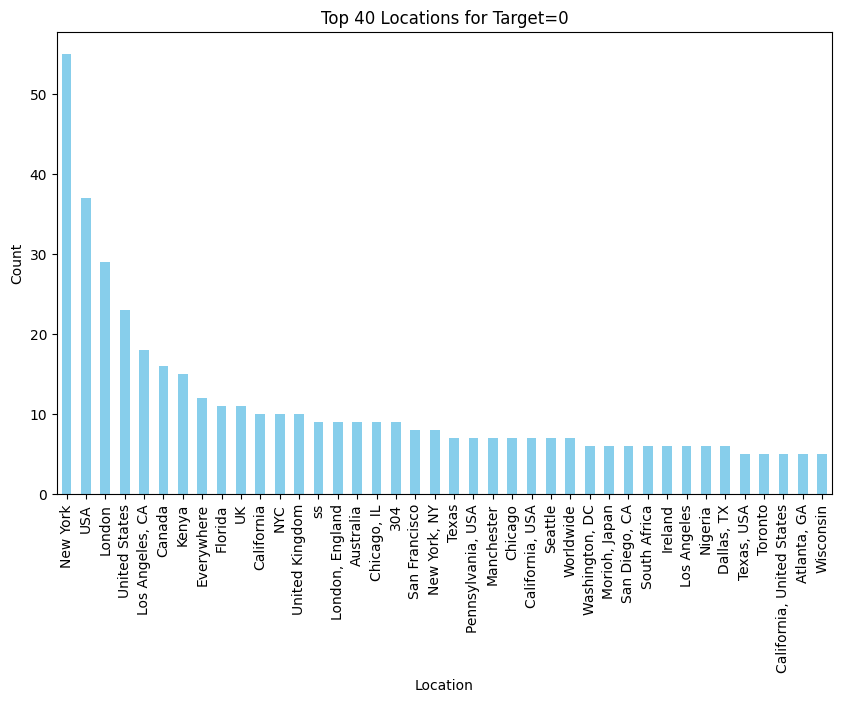

In [44]:
# Filter data where the target column is 1
filtered_data = train_data[train_data['target'] == 0]

# Count the occurrences of each 'location'
location_counts = filtered_data['location'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
location_counts[:40].plot(kind='bar', color='skyblue')
plt.title('Top 40 Locations for Target=0')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

Based on what can be seen in these two graphs, location does not appear to be very helpful.  There is lots of similar locations when looking at real and fake.  

In [45]:
# Drop 'location' column from train_data
train_data = train_data.drop('location', axis=1)



In [46]:
train_data

,id,keyword,text,target
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
7608,10869,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,Police investigating after an e-bike collided ...,1


Next, lets look to see if there is any insight into the keywords column

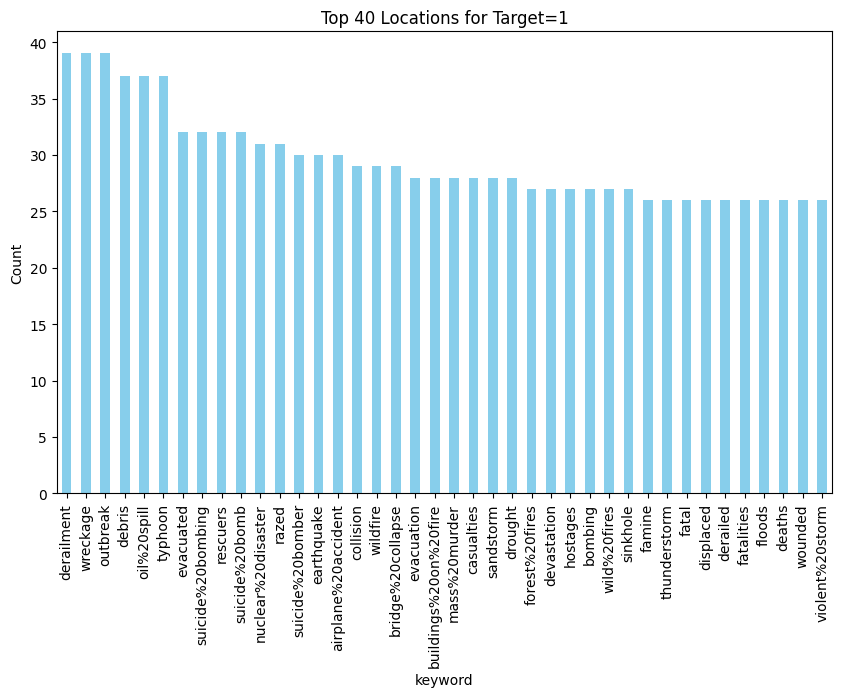

In [47]:
# Filter data where the target column is 1
filtered_data = train_data[train_data['target'] == 1]

# Count the occurrences of each 'keyword'
location_counts = filtered_data['keyword'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
location_counts[:40].plot(kind='bar', color='skyblue')
plt.title('Top 40 Locations for Target=1')
plt.xlabel('keyword')
plt.ylabel('Count')
plt.show()

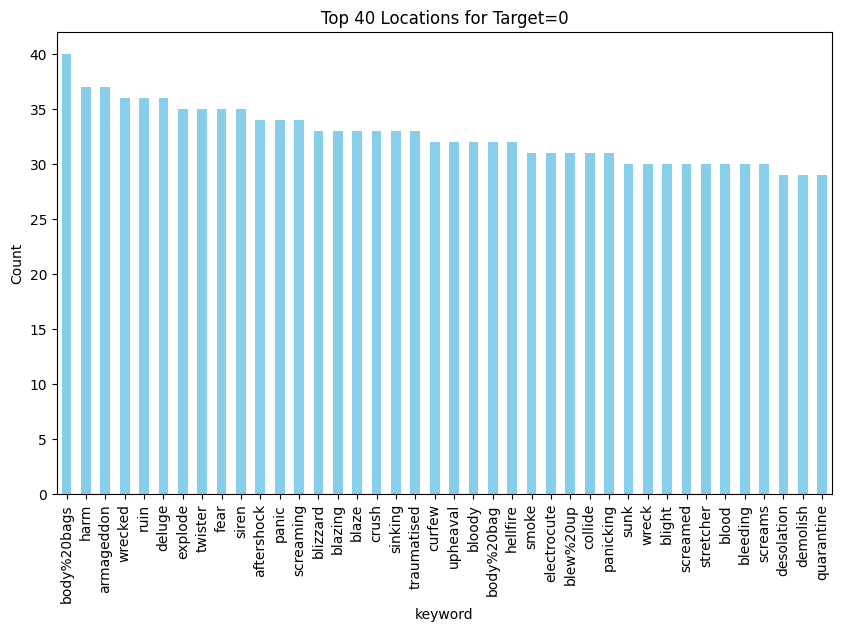

In [48]:
# Filter data where the target column is 1
filtered_data = train_data[train_data['target'] == 0]

# Count the occurrences of each 'keyword'
location_counts = filtered_data['keyword'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
location_counts[:40].plot(kind='bar', color='skyblue')
plt.title('Top 40 Locations for Target=0')
plt.xlabel('keyword')
plt.ylabel('Count')
plt.show()

Lets look into this a little more. 

In [49]:
# Filter data for target value of 1
target_1_data = train_data[train_data['target'] == 1]

# Filter data for target value of 0
target_0_data = train_data[train_data['target'] == 0]

# Extract keywords for target 1 and 0
keywords_1 = set(target_1_data['keyword'].dropna())
keywords_0 = set(target_0_data['keyword'].dropna())

# Find common words
common_keywords = keywords_1.intersection(keywords_0)

# Print the common words
print("Common keywords between target 1 and target 0:", common_keywords)

Common keywords between target 1 and target 0: {'forest%20fires', 'twister', 'arsonist', 'cliff%20fall', 'blew%20up', 'thunder', 'trouble', 'nuclear%20disaster', 'bombed', 'ruin', 'crash', 'collapsed', 'bush%20fires', 'wounded', 'danger', 'blown%20up', 'sinkhole', 'body%20bagging', 'rubble', 'smoke', 'blood', 'mayhem', 'riot', 'lava', 'thunderstorm', 'blaze', 'storm', 'quarantined', 'suicide%20bombing', 'flames', 'drowning', 'windstorm', 'burning', 'deluged', 'exploded', 'famine', 'survivors', 'crush', 'lightning', 'deaths', 'chemical%20emergency', 'weapons', 'catastrophe', 'injured', 'whirlwind', 'eyewitness', 'upheaval', 'forest%20fire', 'devastation', 'panicking', 'hurricane', 'armageddon', 'bioterrorism', 'rioting', 'epicentre', 'injuries', 'mass%20murderer', 'terrorism', 'collide', 'body%20bag', 'explosion', 'collision', 'fatality', 'survive', 'earthquake', 'traumatised', 'derail', 'rescue', 'attack', 'hazard', 'apocalypse', 'injury', 'damage', 'devastated', 'explode', 'sirens', '

In [50]:
# Find unique words in keywords_1 that are not in common_keywords
unique_keywords_1 = keywords_1 - common_keywords

# Find unique words in keywords_0 that are not in common_keywords
unique_keywords_0 = keywords_0 - common_keywords

# Print the number of unique words in keywords_1 and keywords_0
print("Number of unique words in keywords_1:", len(unique_keywords_1))
print("Number of unique words in keywords_0:", len(unique_keywords_0))

Number of unique words in keywords_1: 3
Number of unique words in keywords_0: 1


Based on this, the keyword column is not helpful either so it can be gotten rid of.  

In [51]:
# Drop 'location' column from train_data
train_data = train_data.drop('keyword', axis=1)



In [52]:
train_data

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...,1
7609,10870,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,Police investigating after an e-bike collided ...,1


Now that some EDA has been completed, the data needs to be cleaned up.  Through a series of functions that utilize NLTK, this can be easily accomplished.  

NLTK, or Natural Language Toolkit, is a Python package that you can use for NLP.  NLP contains vast amounts of unstructured data that NLTK aims to help to bring order to.  

In [53]:

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

import pandas as pd


# Function to remove URLs and email addresses
def remove_urls_and_emails(text):
    return re.sub(r'http\S+|www\S+|https\S+|\S+@\S+', ' ', text)
# Function to remove special characters except spaces
def remove_special_chars(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)
# Function to remove punctuation
def remove_punctuation(text):
    remove_punct = str.maketrans('', '', punctuation)
    return text.translate(remove_punct)
# Tokenization function
def tokenize_text(text):
    return word_tokenize(text)
# Function to eliminate stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]
# Lemmatization function
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]
# Combined cleaning function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove digits
    remove_digits = str.maketrans('', '', '1234567890')
    text = text.translate(remove_digits)
    # Remove URLs and emails
    text = remove_urls_and_emails(text)
    # Remove special characters except spaces
    text = remove_special_chars(text)
    # Remove punctuation
    text = remove_punctuation(text)
    # Tokenize text
    tokens = tokenize_text(text)
    # Remove stopwords
    filtered_tokens = remove_stopwords(tokens)
    # Lemmatize tokens
    lemmatized_tokens = lemmatize_tokens(filtered_tokens)
    # Return filtered and lemmatized tokens back into a single string
    return ' '.join(lemmatized_tokens)
# Apply the clean_text function using .apply to avoid SettingWithCopyWarning
train_data['text'] = train_data['text'].apply(lambda x: clean_text(x) if pd.notnull(x) else x)

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


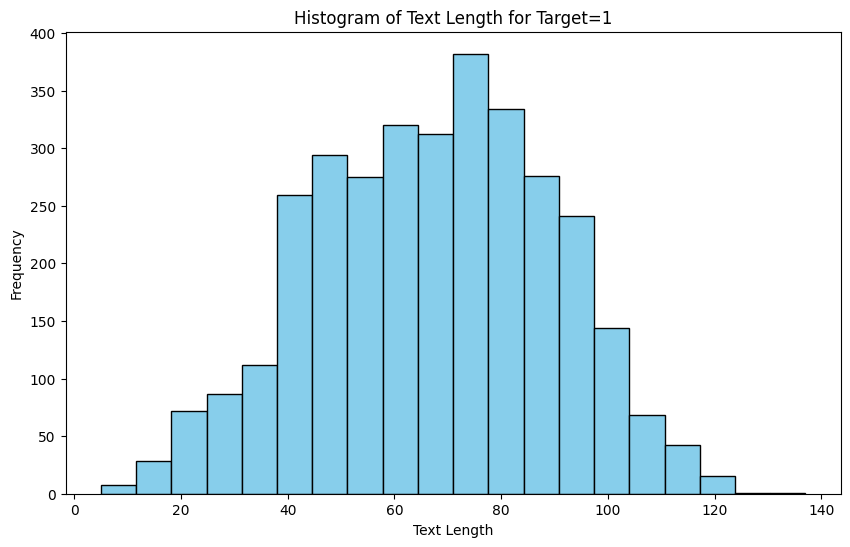

In [54]:
import matplotlib.pyplot as plt



# Filter data where the target column is 1
target_1_data = train_data[train_data['target'] == 1]

# Calculate the length of each 'text' column
text_lengths = target_1_data['text'].apply(len)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Text Length for Target=1')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

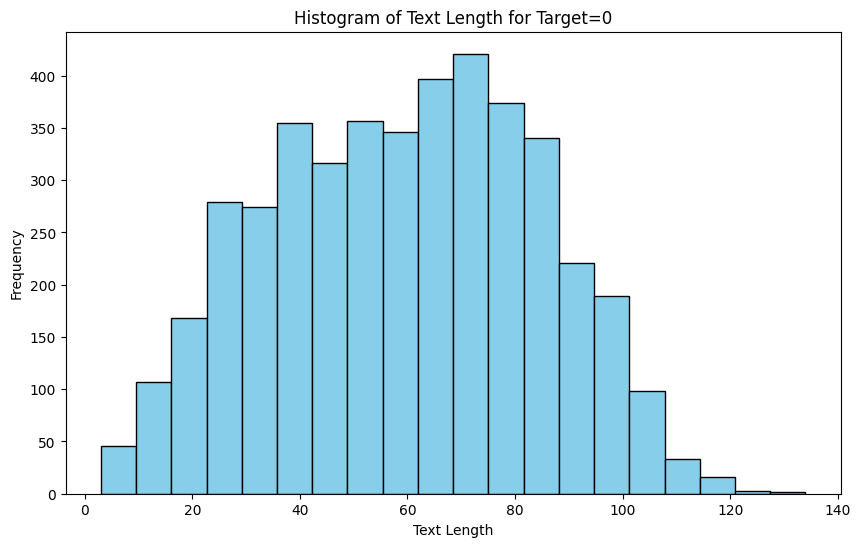

In [55]:
import matplotlib.pyplot as plt



# Filter data where the target column is 0
target_1_data = train_data[train_data['target'] == 0]

# Calculate the length of each 'text' column
text_lengths = target_1_data['text'].apply(len)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Text Length for Target=0')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

After cleaning the data with the functions above, you can see that there isn't really a pattern to the overall length of the each tweet.  

The last step before constructing the models is being able to take everything and put it into matrix form.  

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from itertools import permutations
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  

# Avoid error
train_data_df = train_data.copy()

# indexer function helps organize the matrix into an array
def indexer(M):
    topics = np.argmax(M, axis=1)
    return topics

# the clusterizer function creates a cluster for machine learning
def clusterizer(labels_df, predicted_labels, n=2):  # Binary classification, n=2
    label_names = [0, 1]  
    groups = permutations(range(n))  
    top_label = []
    top_acc = 0
    for group in groups:
        current_accuracy = accuracy_score(predicted_labels, [group[label] for label in labels_df['target']])
        if current_accuracy > top_acc:
            top_acc = current_accuracy
            top_label = group
    return top_label, top_acc

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    train_data_df['text'],
    train_data_df['target'],
    test_size=0.2, random_state=42
)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(min_df=2, max_df=0.99, norm='l2', stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train your classifier (using Support Vector Classifier as an example)
classifier = SVC()
classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
predicted_labels = classifier.predict(X_test_tfidf)

# Use the clusterizer function to find the best label arrangement
best_label_arrangement, best_accuracy = clusterizer(pd.DataFrame({'target': y_test}), predicted_labels, n=2)

print("Best Label Arrangement:", best_label_arrangement)
print("Best Accuracy:", best_accuracy)

Best Label Arrangement: (0, 1)
Best Accuracy: 0.7977675640183848


## Model Training ## 
Next, with the data cleaned and in matrix form I will be using a LSTM (long short-term memory) RNN.  The beauty of using an LSTM is that they have celles within hidden layrs of the neural network which help control the flow of information for the model better.  

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Flatten

# Reshape the TF-IDF matrix for RNN input
X_train_tfidf_reshaped = X_train_tfidf.toarray().reshape(X_train_tfidf.shape[0], 1, -1)
X_test_tfidf_reshaped = X_test_tfidf.toarray().reshape(X_test_tfidf.shape[0], 1, -1)

# Build the RNN model
model = Sequential()
model.add(LSTM(100, input_shape=(1, X_train_tfidf.shape[1]), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_tfidf_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_tfidf_reshaped, y_test))

Epoch 1/10
191/191 [==============================] - 6s 22ms/step - loss: 0.6419 - accuracy: 0.6589 - val_loss: 0.5461 - val_accuracy: 0.7827
Epoch 2/10
191/191 [==============================] - 4s 19ms/step - loss: 0.4309 - accuracy: 0.8342 - val_loss: 0.4487 - val_accuracy: 0.7965
Epoch 3/10
191/191 [==============================] - 4s 20ms/step - loss: 0.3181 - accuracy: 0.8724 - val_loss: 0.4637 - val_accuracy: 0.7853
Epoch 4/10
191/191 [==============================] - 4s 20ms/step - loss: 0.2630 - accuracy: 0.8946 - val_loss: 0.5020 - val_accuracy: 0.7768
Epoch 5/10
191/191 [==============================] - 4s 20ms/step - loss: 0.2238 - accuracy: 0.9123 - val_loss: 0.5323 - val_accuracy: 0.7807
Epoch 6/10
191/191 [==============================] - 4s 20ms/step - loss: 0.1946 - accuracy: 0.9225 - val_loss: 0.5786 - val_accuracy: 0.7715
Epoch 7/10
191/191 [==============================] - 4s 21ms/step - loss: 0.1715 - accuracy: 0.9328 - val_loss: 0.6204 - val_accuracy: 0.7722

These results are pretty promising but I'm going to play with the hyperparameters a little bit and see what results happen if I increase the number of epochs.  

In [58]:
# Reshape the TF-IDF matrix for RNN input
X_train_tfidf_reshaped = X_train_tfidf.toarray().reshape(X_train_tfidf.shape[0], 1, -1)
X_test_tfidf_reshaped = X_test_tfidf.toarray().reshape(X_test_tfidf.shape[0], 1, -1)

# Build the RNN model
model = Sequential()
model.add(LSTM(100, input_shape=(1, X_train_tfidf.shape[1]), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_tfidf_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_tfidf_reshaped, y_test))

# Save the model
model.save('20_epoch.h5')

Epoch 1/20
191/191 [==============================] - 6s 22ms/step - loss: 0.6434 - accuracy: 0.6568 - val_loss: 0.5476 - val_accuracy: 0.7912
Epoch 2/20
191/191 [==============================] - 4s 19ms/step - loss: 0.4333 - accuracy: 0.8351 - val_loss: 0.4487 - val_accuracy: 0.7938
Epoch 3/20
191/191 [==============================] - 4s 19ms/step - loss: 0.3197 - accuracy: 0.8722 - val_loss: 0.4618 - val_accuracy: 0.7853
Epoch 4/20
191/191 [==============================] - 4s 21ms/step - loss: 0.2642 - accuracy: 0.8956 - val_loss: 0.4906 - val_accuracy: 0.7827
Epoch 5/20
191/191 [==============================] - 4s 20ms/step - loss: 0.2253 - accuracy: 0.9095 - val_loss: 0.5291 - val_accuracy: 0.7800
Epoch 6/20
191/191 [==============================] - 4s 19ms/step - loss: 0.1960 - accuracy: 0.9218 - val_loss: 0.5739 - val_accuracy: 0.7682
Epoch 7/20
191/191 [==============================] - 4s 20ms/step - loss: 0.1719 - accuracy: 0.9309 - val_loss: 0.6199 - val_accuracy: 0.7643

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Running the model ##
Now, lets run the model for the testing data.  

In [59]:
test_data.drop(['keyword', 'location'], axis=1, inplace=True)

print(test_data)

         id                                               text
0         0                 Just happened a terrible car crash
1         2  Heard about #earthquake is different cities, s...
2         3  there is a forest fire at spot pond, geese are...
3         9           Apocalypse lighting. #Spokane #wildfires
4        11      Typhoon Soudelor kills 28 in China and Taiwan
...     ...                                                ...
3258  10861  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259  10865  Storm in RI worse than last hurricane. My city...
3260  10868  Green Line derailment in Chicago http://t.co/U...
3261  10874  MEG issues Hazardous Weather Outlook (HWO) htt...
3262  10875  #CityofCalgary has activated its Municipal Eme...

[3263 rows x 2 columns]


In [60]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('20_epoch.h5')


X_new_test_tfidf = tfidf_vectorizer.transform(test_data['text'])

# Reshape the TF-IDF matrix for RNN input
X_new_test_tfidf_reshaped = X_new_test_tfidf.toarray().reshape(X_new_test_tfidf.shape[0], 1, -1)

# Make predictions on the new testing data
predicted_labels_new_test = loaded_model.predict(X_new_test_tfidf_reshaped)
predicted_labels_new_test_binary = (predicted_labels_new_test > 0.5).astype(int)

# Add the predicted labels as a new column named 'target' to the original test_data DataFrame
test_data['target'] = predicted_labels_new_test_binary

# Save the updated DataFrame to a new CSV file
test_data.to_csv('predicted_test_data.csv', index=False)

102/102 [==============================] - 1s 6ms/step


In [61]:
print(test_data.head())

   id                                               text  target
0   0                 Just happened a terrible car crash       1
1   2  Heard about #earthquake is different cities, s...       0
2   3  there is a forest fire at spot pond, geese are...       1
3   9           Apocalypse lighting. #Spokane #wildfires       0
4  11      Typhoon Soudelor kills 28 in China and Taiwan       1


In [62]:
# Save the updated DataFrame to a new CSV file
test_data.to_csv('predicted_test_data.csv', index=False)

## Results and Conclusion ## 
When submitting my results to the Kaggle competition here is what I got:
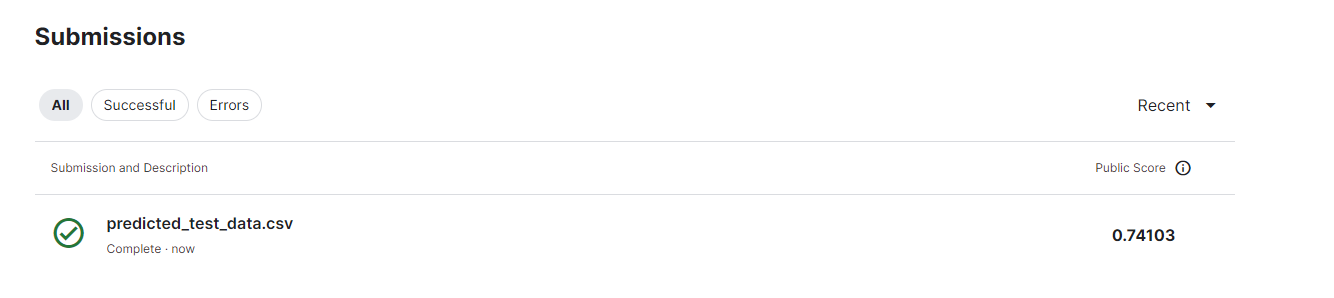

This is an overall fine score for NLP.  The architecture is fairly straightforward and in the future there could be more hyperparameter tuning.  However, I am satisfied overall.  

## Citations ##
For working with RNNs https://www.tensorflow.org/guide/keras/working_with_rnns

For working with tensorflow https://www.tensorflow.org/guide

For working with tfidvec https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html